We want to standardise the beta maps so that they all have the same standard deviation (given by the convergence criterion) rather than having the same external amplitude. In essence, we're now not letting the amplitude and exponent of the $C_\ell^\beta$ be independent:
$$
C_\ell^{\beta\beta} = A_\beta \left(\frac{\ell}{80}\right)^\gamma \quad \Rightarrow \quad \sigma_\beta = 0.868589...
$$

# RESULT

$$
A_\beta = \left(\frac{\sigma(\mathrm{desired})}{\mathrm{std}(\beta\mathrm{-map})}\right)^2
$$

In [1]:
%load_ext autoreload
# to make modification in .py file type %autoreload

%load_ext line_profiler
#for finding out how long code takes to run
#an example of how to get diagnostics on functions
#%lprun -f ff.generate_map_full ff.generate_map_full(384, A_BB, alpha_BB, beta_sigma, freqs, nu0)

In [36]:
#trying to consolidate the work so far into a cohesive document and notation. Pushing definitions into 
#separate .py file

#------packages-------------------
%pylab inline
import time
import healpy as hp
import matplotlib.pyplot as plt
import foreground_functions as ff
import scipy.special as sp #for the zeta function sp.zeta() in the 0x2 term
from scipy.stats import kstest, norm

#-------BB parameters (to start)--------
A_BB = 1.7e3
alpha_BB = -3.0
beta_BB = -3.2
beta_sigma = 1.5e-6

A_beta = 1e-6
gamma_BB = -2.5 #needs to be less than -2 for the 0x2 term to converge
nu0 = 95e9

# #-------map paramters--------------------
nside = 128
Lmax = 3*nside
ells = np.arange(0,Lmax)

#define list of frequencies going from 10 to 300 GHz, sampling 20 points
freqs = np.linspace(30,300,4)*1.e9

Populating the interactive namespace from numpy and matplotlib


In [72]:
#define some different ranges of each parameter

#set of alpha values
alphas = np.linspace(-6., -1., 6)
#set of beta_0 values
beta_0s = np.linspace(-6., -1., 10)
#set of gamma values
gammas = np.linspace(-4., -2.001, 10)
#set nu0 values
nu0s = np.linspace(2.3e9, 100e9, 3)

In [37]:
bcls = ff.powerlaw(ells, gamma_BB)

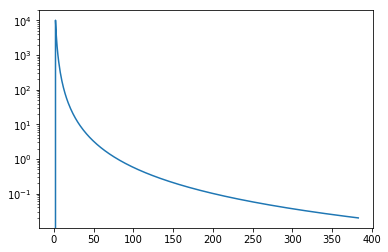

In [38]:
semilogy(bcls)

In [71]:
beta_map = hp.synfast(bcls, nside, new=True, verbose=False)

In [61]:
std_original = np.std(beta_map)


In [62]:
#criterion for convergence
crit = 2./log(10)
#we want this to be, for example 3x the std of the beta map so
#nearly all pixels converge.

In [63]:
beta_map = beta_map * (crit/3) / np.std(beta_map)

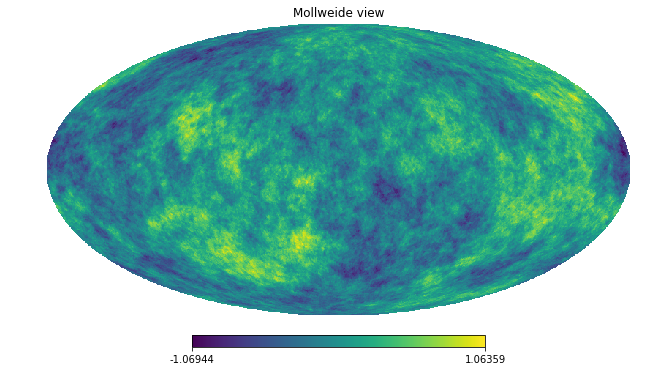

In [64]:
hp.mollview(beta_map)

In [65]:
3*std(beta_map)

0.8685889638065034

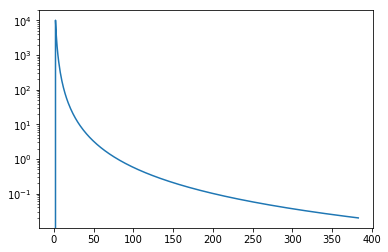

In [66]:
semilogy(bcls)

In [67]:
check_bcls = hp.anafast(beta_map)

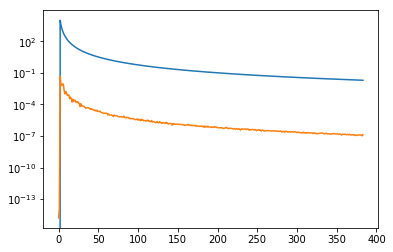

In [68]:
semilogy(bcls)
semilogy(check_bcls)

In [69]:
check_bcls= check_bcls * (std_original/(crit/3))**2

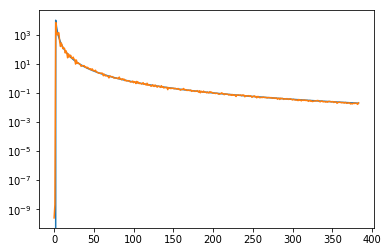

In [70]:
semilogy(bcls)
semilogy(check_bcls)

In [80]:
%autoreload

-3.1999999999999997
0.28952965460216784

-3.1999999999999997
0.2895296546021678

-3.1999999999999997
0.2895296546021679

-3.200000000000001
0.28952965460216784

-3.200000000000001
0.2895296546021679

-3.1999999999999997
0.28952965460216784

-3.200000000000001
0.2895296546021679

-3.200000000000001
0.28952965460216784

-3.200000000000001
0.2895296546021678

-3.1999999999999997
0.2895296546021679



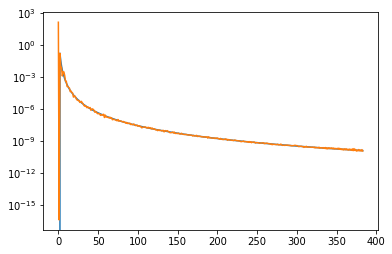

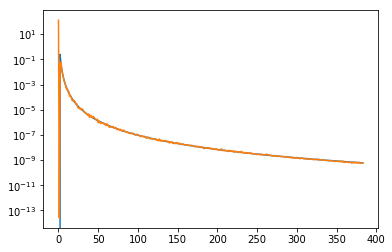

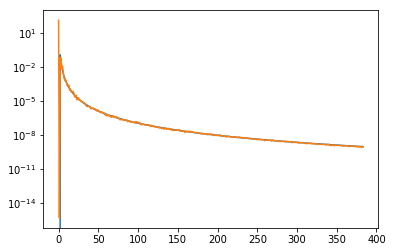

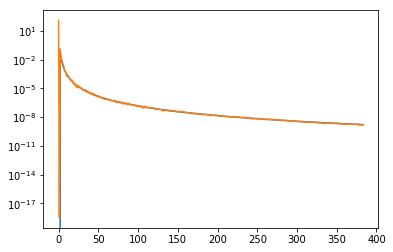

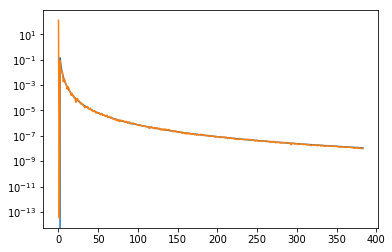

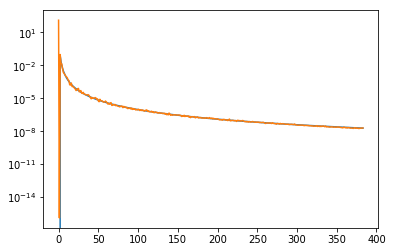

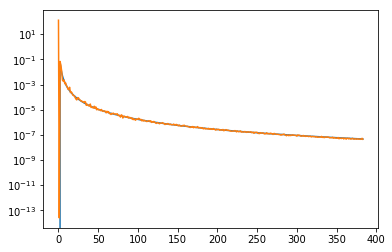

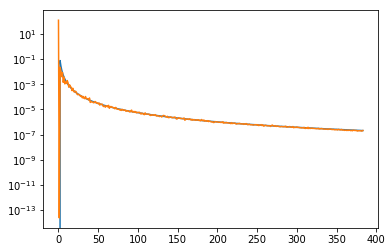

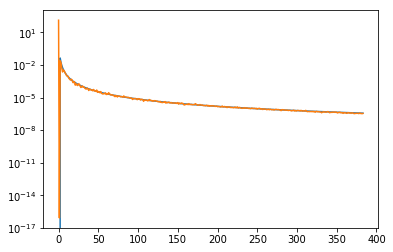

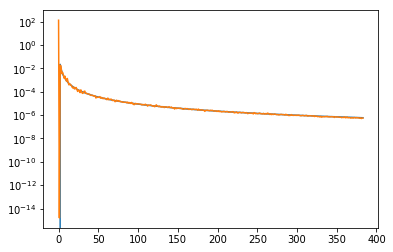

In [81]:
for gamma in gammas:
    bcls, newmaps = ff.map_power_beta(gamma=gamma)
    check_bcls=hp.anafast(newmaps)
#     hp.mollview(newmaps)
    print(np.mean(newmaps))
    print(np.std(newmaps))
    print('')
    figure()
    semilogy(bcls)
    semilogy(check_bcls)

In [90]:
freq = np.array(1e9)[np.newaxis]
# freq = freq[np.newaxis]

In [91]:
for i in freq:
    print(i)

1000000000.0


In [92]:
freq.shape

(1,)

In [93]:
freq

array([1.e+09])

In [94]:
freq[0]

1000000000.0

In [215]:
#set of alpha values
fake_alphas = np.linspace(-6., -1., 2)
#set of beta_0 values
fake_beta_0s = np.linspace(-6., -1., 2)
#set of gamma values
fake_gammas = np.linspace(-4., -2.001, 2)
#fake frequencies
fake_freqs = np.linspace(30,300, 2)*1e9

In [222]:
%autoreload

In [223]:
start = time.time()
chi_2, chi2 = ff.chi2(fake_freqs, fake_alphas, fake_beta_0s, fake_gammas)
print(time.time()-start)

alpha=-6.00
alpha=-1.00
51.86755585670471


In [224]:
chi_2

9021262733.012016

In [225]:
chi2.shape

(2, 2, 2, 2, 1)